## SIR Example

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12.5, 4)

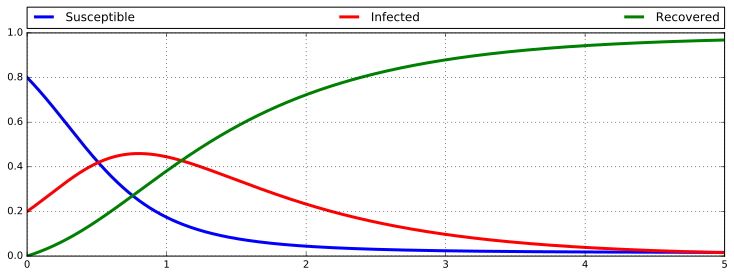

In [2]:
from SIR import *
sir = SIR(tstart=0.00, tend=5, dt=.001, beta=4, gamma=1, N=1)
sir.Initialize(S0=0.8, I0=0.2, R0=0);
sir.Simulate();
sir.PlotSIR(1)

## Prepare data

In [3]:
import random as rn
eps    = 0.05
noise  = eps*np.random.randn(3,sir._Time.shape[0])
dnoise = eps*np.random.randn(3,sir._Time.shape[0])

data  = np.transpose(np.insert(np.array([sir._SS , sir._II , sir._RR]) + noise,0,sir._Time,axis=0))
ddata = np.transpose(np.insert(np.array([sir._dSS, sir._dII, sir._dRR])+dnoise,0,sir._Time,axis=0))

## SINDy at work

Initiated a class for Sparse Identification from Numerical Dynamics
**** Derivative Set ****
**** Candidate functions library has been created ****
**** Performing regression. Please wait... ****
Iteration in progress:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
**** Identification is complete. We now use it to simulate the system. ****


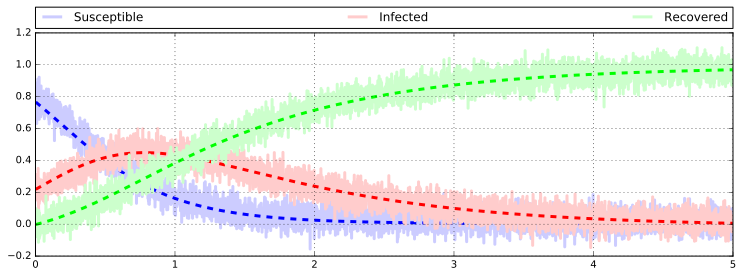

In [4]:
from SINDy import *
sin = SINDy(data=data,polyorder=2,usesine=False,cutoff=0.05)
sin.SetDerivative(ddata)
sin.RunSINDy(simulate=True)
sin.SINDyPlot(statesymbols=["Susceptible","Infected","Recovered"],
              datacolors=[[0.8, 0.8, 1.0],[1.0, 0.8, 0.8],[0.8, 1.0, 0.8]],
              simcolors =[[0.0, 0.0, 1.0],[1.0, 0.0, 0.0],[0.0, 1.0, 0.0]])

In [5]:
sin.StringModelView(StateVariables=["S","I","R"])

dS/dt = -0.45 + -0.31 S  + -0.35 I  +  0.90 R  +  0.48 S^2  + -1.56 I S  +  0.28 S R  +  0.41 I^2  +  0.39 I R  + -0.45 R^2 
dI/dt =  0.13 +  0.40 S  + -0.19 I  + -0.80 R  + -0.32 S^2  +  1.83 I S  + -0.62 S R  + -0.43 I^2  + -0.18 I R  +  0.67 R^2 
dR/dt =  0.44 + -0.43 S  +  0.36 I  + -0.35 R  +  0.06 S^2  +  0.00 I S  +  0.63 S R  +  0.08 I^2  +  0.00 I R  + -0.08 R^2 
